<a href="https://colab.research.google.com/github/Jacobgokul/ML-Playground/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔹 Type: Supervised Learning (Used for both Classification & Regression)

🔹 Working Principle: Splits data based on feature conditions to form a tree structure.

🔹 When to Use: When you need interpretability & handle non-linear data.

#Key Concepts of Decision Tree

🔹 Root Node → The starting point of the tree (contains the entire dataset).

🔹 Decision Nodes → Intermediate nodes where conditions are checked.

🔹 Leaf Nodes → Final nodes that give the prediction (0 or 1 in classification).

🔹 Splitting → The process of dividing data into subgroups based on the best feature.

🔹 Impurity Measures:
- Gini Impurity (for classification)
- Entropy (Information Gain) (for classification)
- Mean Squared Error (MSE) (for regression)

# How Decision Trees Work?
Decision Trees split the dataset into multiple decision nodes based on the best feature selection. It keeps dividing until the stopping criteria is met.

In [4]:
import pandas as pd
data = {
    "Age": [22, 25, 30, 35, 40, 50, 55],
    "Income_LPA": [8, 10, 15, 12, 25, 20, 35],
    "Buys_House": [0, 0, 0, 1, 1, 0, 1]  # 0 = No, 1 = Yes
}

df = pd.DataFrame(data)
df

,Age,Income_LPA,Buys_House
0,22,8,0
1,25,10,0
2,30,15,0
3,35,12,1
4,40,25,1
5,50,20,0
6,55,35,1


##Step-by-Step Process
###Step 1: Select the Best Feature for Splitting
We calculate the Gini impurity or Entropy for both Age and Income.

- If Income gives the best split, we create a decision node for Income.

- If Age gives the best split, we create a decision node for Age.

###Step 2: Create Decision Nodes
Assume Income is chosen as the best feature:
- If Income < 15 LPA, predict No (0)
- If Income >= 15 LPA, check Age
  - If Age < 35, predict No (0)
  - Else, predict Yes (1)

###Step 3: Continue Splitting Until Stopping Criteria
The tree keeps splitting until:

- All data in a node belong to one class (pure node).
- The depth limit is reached.
- Further splits don't improve accuracy significantly.



                [Root: Income]
                   |
        -----------------------
        |                     |
    Income < 15          Income >= 15
        |                     |
       No              [Check Age]
                          |       |
                      Age < 35   Age >= 35
                          |          |
                         No         Yes

##Pros & Cons of Decision Tree
### Advantages:
✔ Easy to understand & interpret

✔ Handles both numerical & categorical data

✔ Works well with non-linear relationships

###Disadvantages:
✘ Overfitting if the tree is too deep

✘ Sensitive to noisy data

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

In [6]:
#spliting train and test data
# Define Features (X) and Target (y)
X = df[["Age", "Income_LPA"]]
y = df["Buys_House"]

# Split into Train (80%) & Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=2)

# Train the model
dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,2
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [8]:
#prediction
# Predict on test data
y_pred = dt_model.predict(X_test)

# Print Predictions
print("Predicted Values:", y_pred)
print("Actual Values:", y_test.values)


Predicted Values: [1 1]
Actual Values: [0 0]


In [9]:
#evalute model performance

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.00
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



d:\A Code\ML-Playground\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\A Code\ML-Playground\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\A Code\ML-Playground\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\A Code\ML-Playgrou

##Visual representation of tree

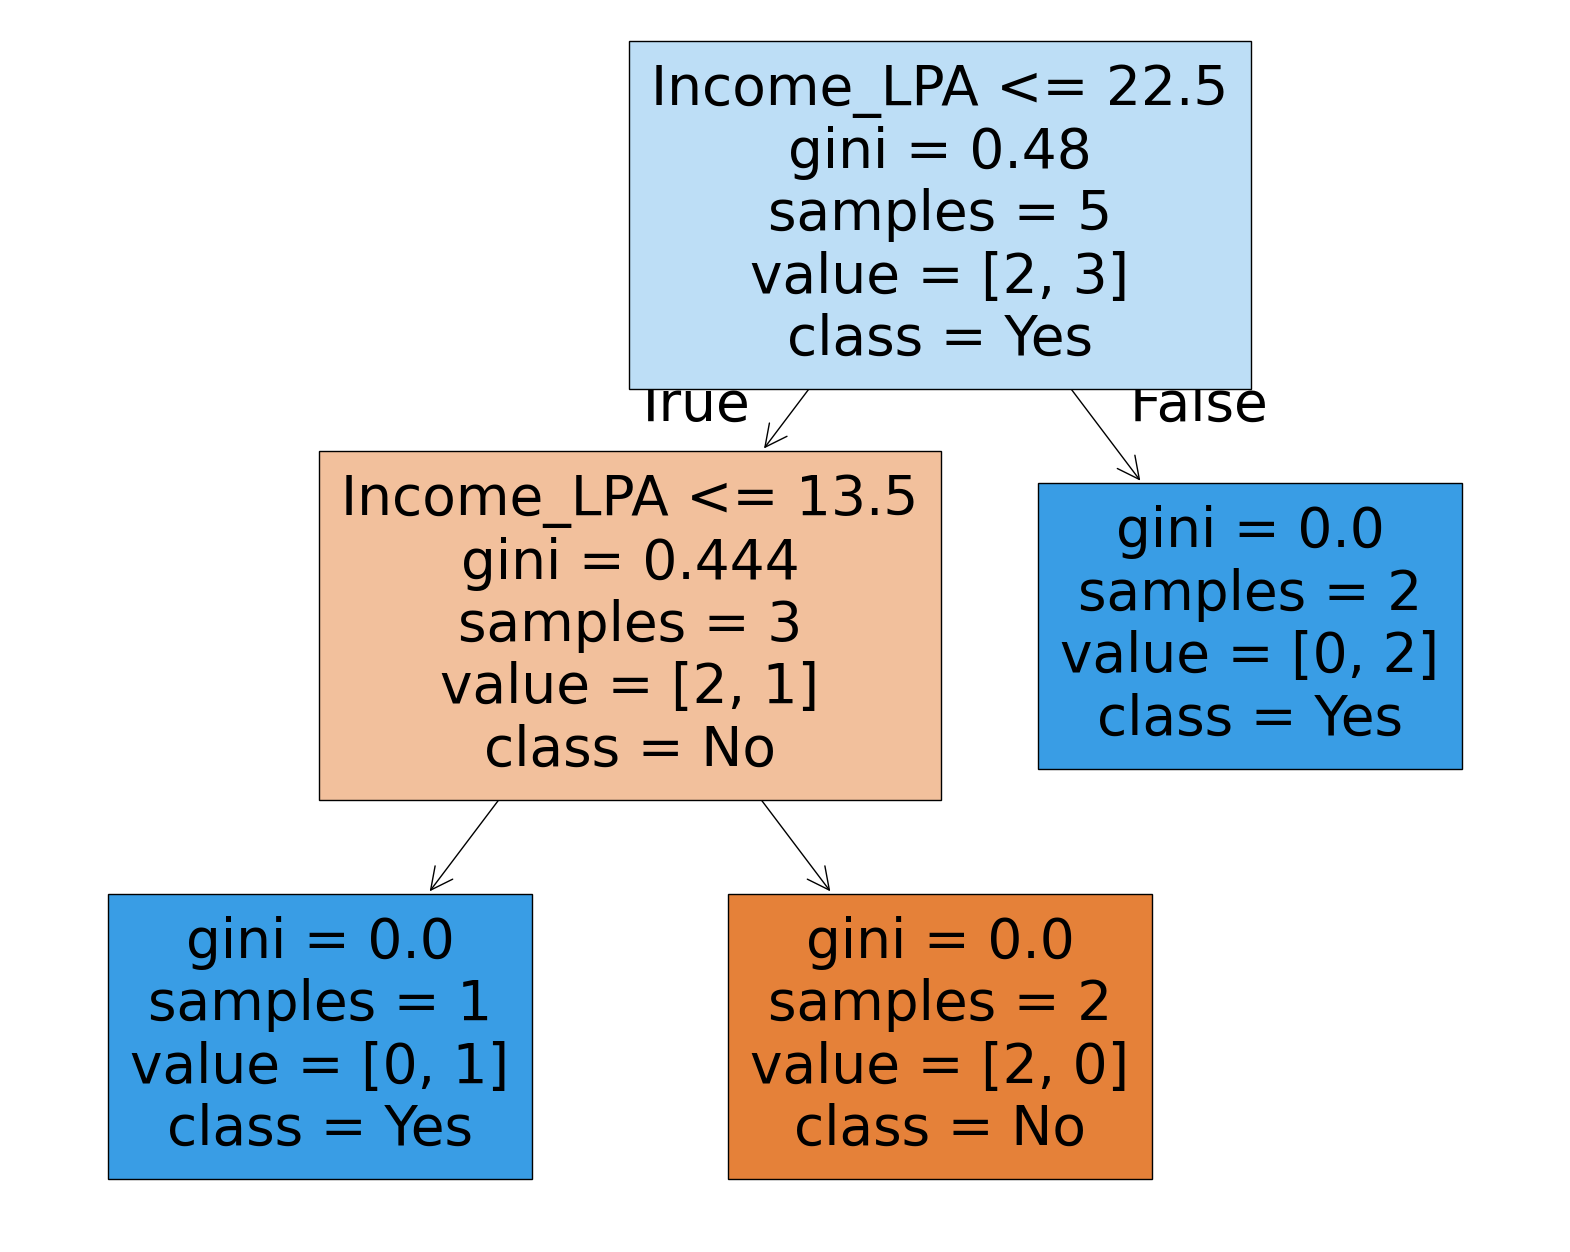

In [10]:
# Plot the Decision Tree
plt.figure(figsize=(20,16))
plot_tree(dt_model, feature_names=["Age", "Income_LPA"], class_names=["No", "Yes"], filled=True)
plt.show()